# DotArray Object for a Quadruple Quantum Dot Array

This tutorial tests the dot maksing and effective parameter calculation on a 4-qubit system. 

See 2-qubit tutorial for more detailed explanations. 

Necessary imports and default plotting parameters:

In [1]:
import os
from pathlib import Path
path = Path(os.getcwd())

# update base working directory to QuDiPy
if path.stem != 'QuDiPy':
    print(path.parents[1])

    base_dir = path.parents[1]
    os.chdir(base_dir)
else:
    base_dir = path

c:\QuDiPy


In [2]:
import numpy as np
from qudipy.system import DotArray

## 1. Generate Dots object instance

Define variables to initialize Dots object instance

In [3]:
nav_dir = os.path.join('QuDiPy data', 'tutorials')
processed_dir = os.path.join(base_dir, nav_dir,
                            'processed','4QD_processed')
nextnano_dir = os.path.join(base_dir, nav_dir,
                                    'nextnano','4QD')
file_prefix = 'tutorial'
n_dots = 4      # anticipated number of dots

Define control parameters to use when interpolating the potential data from nextnano: must be a subset of the raw data. 

In [4]:
pts = [3,3,3,3,3,3,3]
# old effective parameters calculated on hfss
ctrl_vals = [ 
    np.linspace(0.2, 0.35, pts[0]),
    np.linspace(0.0, 0.15, pts[1]),
    np.linspace(0.2, 0.35, pts[2]),
    np.linspace(0.0, 0.15, pts[3]),
    np.linspace(0.2, 0.35, pts[4]),
    np.linspace(0.0, 0.15, pts[5]),
    np.linspace(0.2, 0.35, pts[6])]

Create DotArray object instance

In [5]:
#Process/Load/Calculate with subset of raw nextnano data and desire file prefix
# to add to saved interpolator files.
dots = DotArray(n_dots, ctrl_ranges=ctrl_vals)
dots.numeric(processed_dir, nextnano_dir, file_prefix)

Loading pre-calculated spin interpolators from
c:\QuDiPy\QuDiPy data\tutorials\processed\4QD_processed\tutorial_spin_data_size_[3 3 3 3 3 3 3]_from_[0.2 0.  0.2 0.  0.2 0.  0.2]_to_[0.35 0.15 0.35 0.15 0.35 0.15 0.35].pkl


### 1.1 Dot Masking

Checking how individual dots and dot pairs are masked

In [6]:
# Choose voltage control values
voltage_config = [0.3, 0.0, 0.2, 0.05, 0.24, 0.05, 0.27]

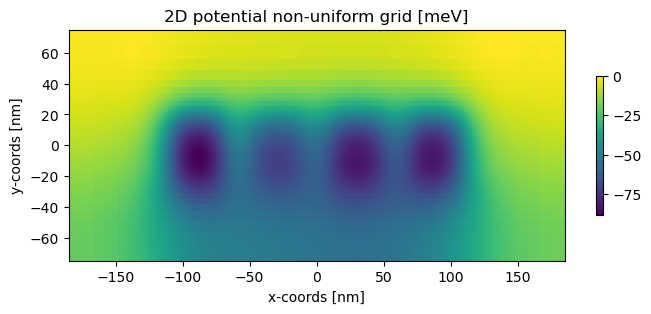

In [7]:
dots.potential.plot(voltage_config, plot_units='meV')

In [8]:
# dot1, dot2, dot3, dot4 = dots.split(group='single')

In [9]:
# dot1.potential.plot(voltage_config, plot_units=['eV', 'm'])
# dot2.potential.plot(voltage_config, plot_units=['eV', 'm'])
# dot3.potential.plot(voltage_config, plot_units=['eV', 'm'])
# dot4.potential.plot(voltage_config, plot_units=['eV', 'm'])

In [10]:
# voltage configuration for 4 QD array i.e. [V1, W1, ..., W3, V4]
voltage_config = [0.253, 0.02, 0.27, 0.015, 0.27, 0.015, 0.27]

# exchange calcualted with old dot splitting routine
dots.exchanges(voltage_config)

array([           nan, 5.33329257e-46,            nan])

In [11]:
# newly calculated exchange
dots.exchanges(voltage_config, exact=True)

Exchange HM evaluation: control vector=[0.253, 0.02, 0.27, 0.015, 0.27, 0.015, 0.27]:   0%|          | 0/1 [00:00<?, ?it/s]

Exchange HM evaluation: control vector=[0.253, 0.02, 0.27, 0.015, 0.27, 0.015, 0.27]: 100%|██████████| 1/1 [00:16<00:00, 16.48s/it]


array([1.37546074e-36, 3.90273504e-44, 3.49831058e-37])

In [12]:
# # TODO: remove deep copy when splitting, eats up RAM
dotpair1, dotpair2, dotpair3 = dots.split(group='pair')

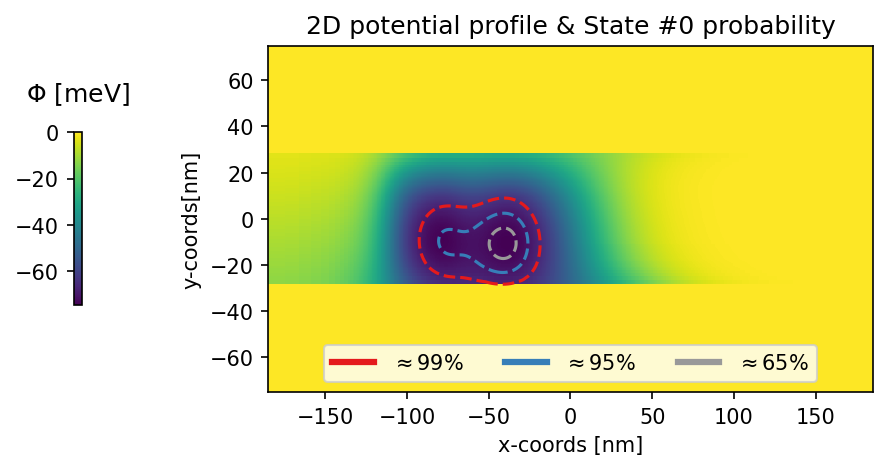

In [13]:
voltage_config = [0.217, 0.15, 0.2, 0.0, 0.2, 0.0, 0.3]
dotpair1.potential.plot(voltage_config, plot_units='meV', show_wf=True)

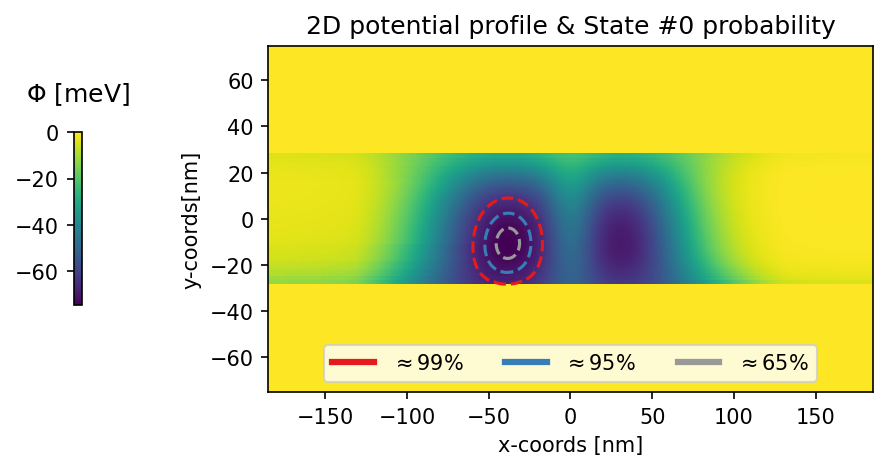

In [14]:

dotpair2.potential.plot(voltage_config, plot_units='meV', show_wf=True)
dotpair2.potential.plot(voltage_config, plot_units='meV', show_wf=True, x_slice=-46e-9, plot_type='1D')
dotpair3.potential.plot(voltage_config, plot_units='meV', show_wf=True)

In [ ]:
# delete variables from memory if no longer needed
del dotpair1, dotpair2, dotpair3

## 2 Evaluate effective parameters

For a specific control voltage configuration, the $g$-factor deviations and exchange couplings are determined for each dot or neighboring pair, respectively.

g-factor deviation for multiple voltage vectors. Evaluated exactly (`exact=True`) or using the interpolation object (`exact=False`)

g_factor evaluation: control vector=[0.25, 0.0, 0.25, 0.0, 0.3, 0.0, 0.25]: 100%|██████████| 5/5 [05:24<00:00, 64.95s/it]  


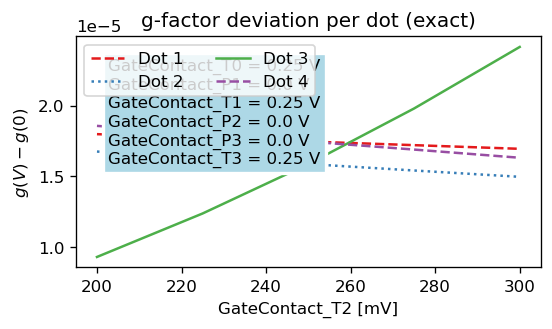

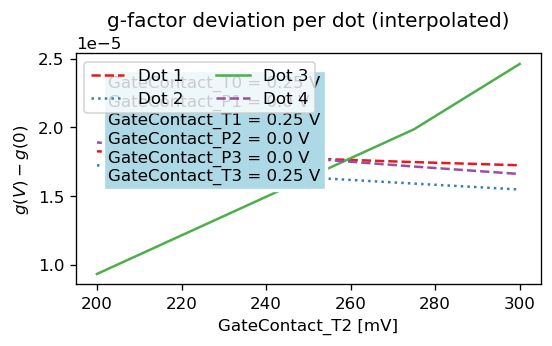

In [ ]:
voltage_configs = []
v3_sweep = np.linspace(0.2,0.3,5)

voltage_configs =[ [0.25,0.0,0.25, 0.0,volt, 0.0, 0.25] for volt in v3_sweep]
    
dots.plot(voltage_configs, param='gfactor', exact=True)
dots.plot(voltage_configs, param='gfactor', exact=False)

Exchange for multiple tunneling gate voltages: plotting exchange for a path through voltage state space.

Exchange HM evaluation: control vector=[0.2, 0.0, 0.2, 0.0, 0.2, 0.07, 0.2]: 100%|██████████| 4/4 [02:32<00:00, 38.20s/it]                


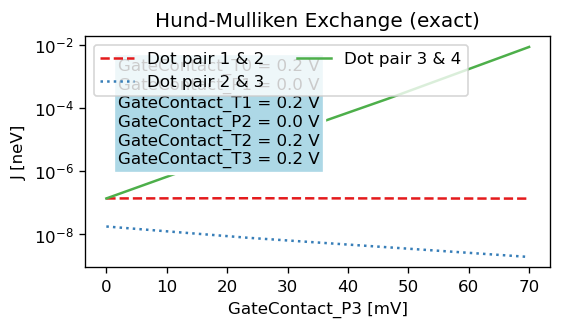

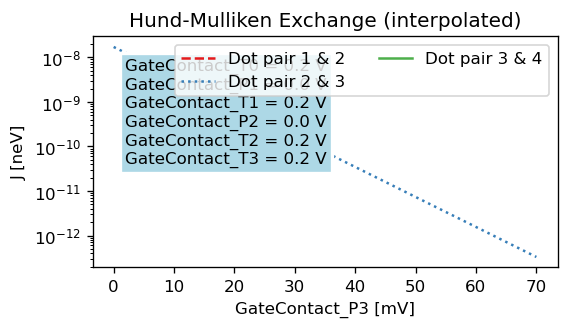

In [ ]:
voltage_configs = []
v = np.linspace(0.0,0.07,4)
for volt in v:
    voltage_configs.append([0.2, 0.0, 0.2, 0.0, 0.2, volt, 0.2])

# dots.plot(voltage_configs, param='hl', ex_units='neV', yscale='log', exact=True)
dots.plot(voltage_configs, param='hm', yscale='log', exact=True, plot_units='neV')
dots.plot(voltage_configs, param='hm', yscale='log', exact=False, plot_units='neV')